In [7]:
#เตรียมการ library
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,20
print(cv2.__version__)

3.3.0


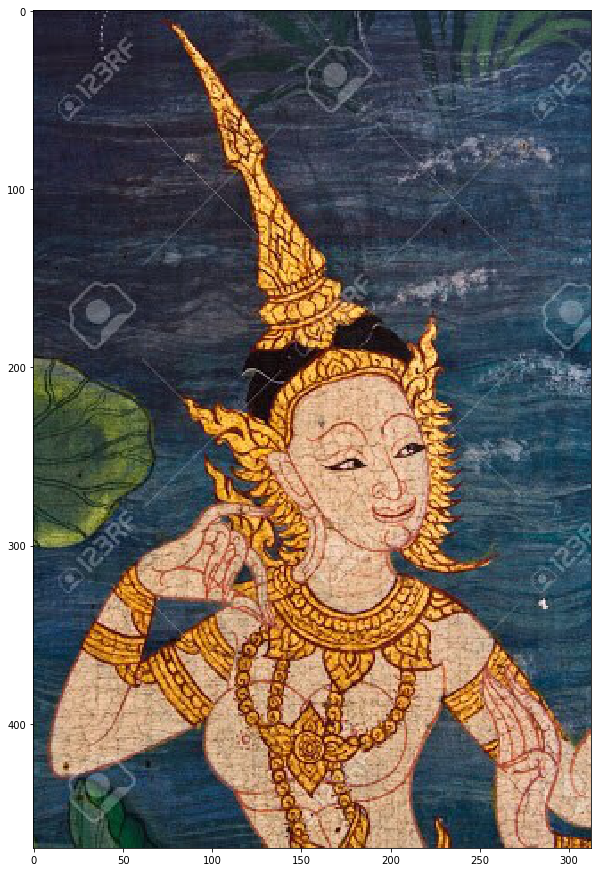

In [8]:
#ขั้น 0: โหลดรูปภาพต้นฉบับ
ori_image = cv2.imread("original.jpg")
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB) # cv2 use bgr but plt use rgb
plt.imshow(ori_image)

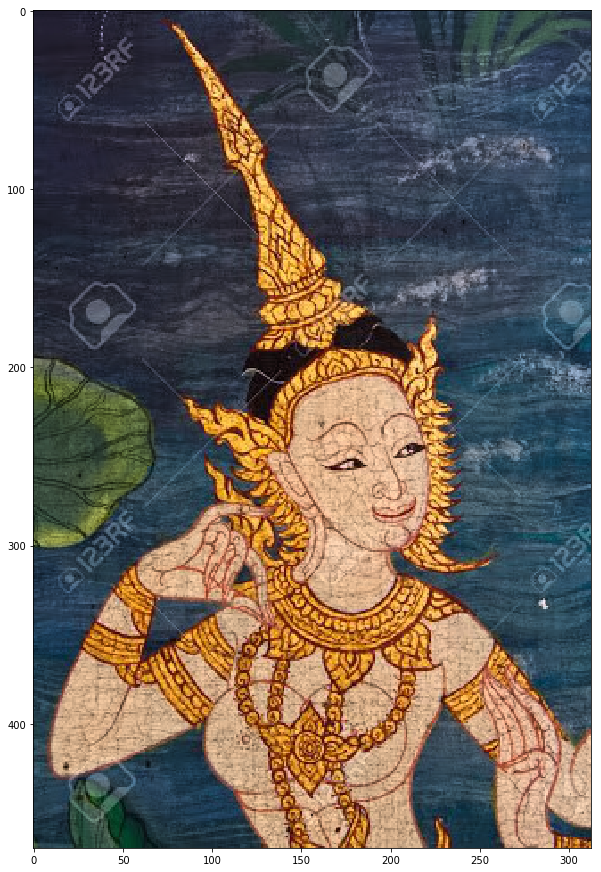

In [21]:
denoise_image = cv2.fastNlMeansDenoisingColored(ori_image)
plt.imshow(denoise_image)

In [25]:
denoise_image[32,171] - denoise_image[27,171] #From this step, we get water mask use streng [35,35,35] 

array([35, 35, 37], dtype=uint8)

In [63]:
low_image = denoise_image.copy()
height,width,channel = low_image.shape
for i in range(height):
    for j in range(width):
        for k in range(channel):
            low_image[i][j][k] -= 35

In [64]:
removed_watermark = denoise_image.copy()
for i in range(height):
    for j in range(width):
        for k in range(channel):
            a =  int(removed_watermark[i][j][k]) + int(removed_watermark[i][j][k])
            a = a/2
            if(a > 255):
                print("ERROR")
            removed_watermark[i][j][k] = int(a)

In [55]:
removed_watermark = np.asarray(removed_watermark)

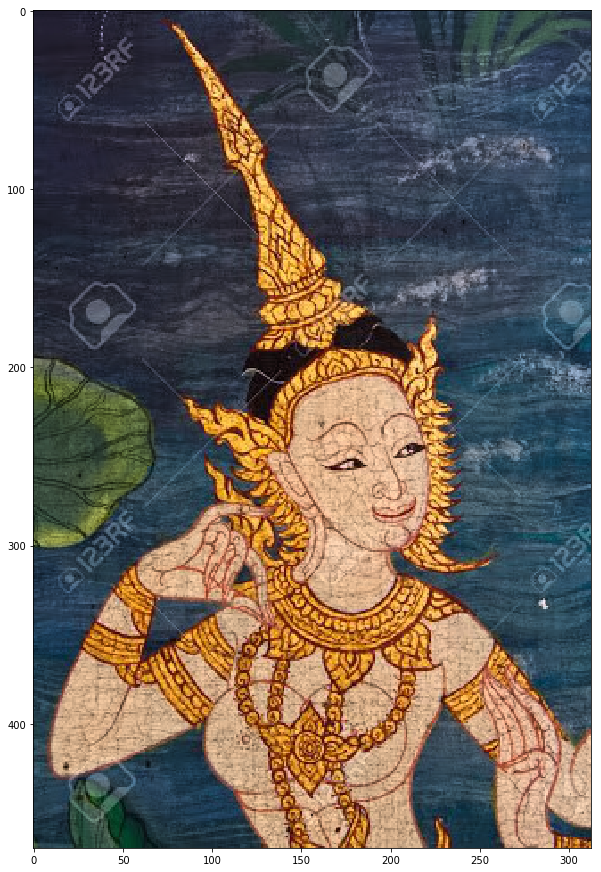

In [65]:
plt.imshow(removed_watermark)